## Making useful Corner / triangle plots with `pycorner`

Often we find ourselves in possession of samples drawn from a multivariate probability distribution $p(\theta)$, whose full form is not known to us. These samples usually come from an inferencing algorithm that attempts to measure the same distribution. A combined two-dimensional and one-dimensional visualization of the data is a useful tool to understand the properties of $p(\theta)$ and various bivariate correlations hidden inside of it.

Contemporary libraries like `seaborn`, `triangle` and `corner` have functionality to make these figures, but all of them lack one or the other aspect often desired while understanding inferred posteriors for source parameters of gravitational-wave sources - such as customizability of two-D panels to show multiple analyses together, ability to show the prior distributions, ability to show contours of a mapped variable on the two-dimensional panels. Our class `pycorner.CornerPlot` hopes to achieve the same.


In [1]:
# import imp
from pycorner import CornerPlot
import numpy as np
import pandas as pd

# import h5py
import pycbc.pnutils as pnu

This function loads a file containing samples from a posterior probability distribution. The details of data storage in that file are not relevant to the purposes of this tutorial.

In [2]:
def load_bilby_posterior(file_name):
    with open(file_name, "r") as fin:
        params = fin.readline()
        params = params.strip("\n").split(" ")
        dd = np.loadtxt(fin)
        post = pd.DataFrame(dd, columns=params)
    return post

In [3]:
file_name = "GW170104_samples.dat"

In [1]:
!head -n3 GW170104_samples.dat

mass_ratio chirp_mass luminosity_distance dec ra theta_jn psi chi_1 chi_2 time_jitter
0.5033441261375726 28.15823929487552 715.7991109220902 0.03906354731586185 1.9798213979861554 0.7343670930331043 1.4290366161886223 0.1952283601835418 -0.08152844710758034 0.00010601587507930491
0.8085184210688845 29.432845045335384 1767.1342638025899 0.5118926175454116 2.0603609146876525 2.774945539311565 2.793118740169467 0.24411230374779413 -0.002295618529051752 1.631352024365247e-05


In [5]:
post = load_bilby_posterior(file_name)

In [6]:
post["mass1"], post["mass2"] = pnu.mchirp_q_to_mass1_mass2(
    post["chirp_mass"].to_numpy(), post["mass_ratio"].to_numpy()
)

In [7]:
post.head()

mass_ratio  chirp_mass  luminosity_distance       dec        ra  theta_jn  \
0    0.503344   28.158239           715.799111  0.039064  1.979821  0.734367   
1    0.808518   29.432845          1767.134264  0.511893  2.060361  2.774946   
2    0.967572   31.827125          1057.190226  1.001497  2.363783  1.215422   
3    0.483684   25.747309          1045.492719 -0.544978  6.110964  0.700475   
4    0.843077   28.699529           818.721173 -0.700926  0.085533  1.240815   

        psi     chi_1     chi_2  time_jitter      mass1      mass2  
0  1.429037  0.195228 -0.081528     0.000106  46.120942  23.214705  
1  2.793119  0.244112 -0.002296     0.000016  37.642883  30.434964  
2  2.693718  0.570519  0.028617    -0.000235  37.168371  35.963081  
3  1.512414 -0.098160  0.119254     0.000235  43.078728  20.836512  
4  0.151792  0.260177 -0.076803     0.000028  35.930483  30.292174

In [8]:
post.to_numpy().shape

(8988, 12)

### Initialize `CornerPlot` class with samples

The necessary argument is:
1. A 2D array-type datastructure with columns / rows stacking independent samples of different variables. The dimension with a smaller extent is assumed to represent different variables, unless `var_names` is given a list with the number of elements equal to the data's dimension with larger extent.

Other useful though optional arguments are:
1. `var_type`: a string specifying the variable type of each variable in order. E.g. if there are 3 parameters and all are continuous variables, provide 'ccc', while if the second of the 3 parameters is discrete with (without) order, provide 'coc' ('cuc'). The default choice is to assume all variables are continuous.
1. `var_names`: List of strings equal in length to the number of columns in data array. Defaults to using whole numbers starting from zero.
1. `verbose`: Show log messages. Defaults to `True`.

In [9]:
pl = CornerPlot(post.to_numpy(), var_names=post.columns.to_list())

### Scatter plots on 2D panels

Lets make a simple corner plot showing the distribution of two variables. The default visualization for the 1D panels is to only mark the $90\%$ credible intervals. We can enable the demarkation of median values explicitly by setting `show_oned_median=True`. The default visualization for the 2D panels is show a scatter plot. Colors are chosen randomly, so every time one calls this function a new color is chosen, unless manually assigned by setting `color` to one of the colors that `matplotlib` recognizes, e.g. `b`, `r`, `g`, etc.

/home/prayush/miniconda3/lib/python3.8/site-packages/pycorner/corner.py:523: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  im = ax.scatter(
/home/prayush/miniconda3/lib/python3.8/site-packages/pycorner/corner.py:735: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(new_xticklabels)


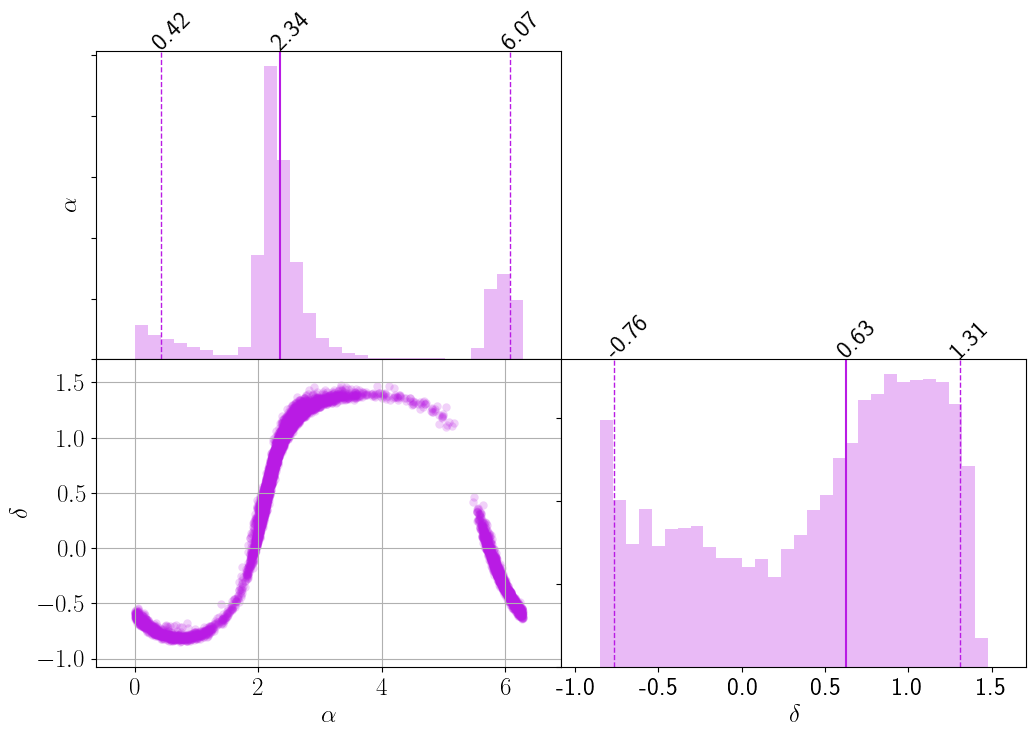

In [11]:
axs = pl.draw(["ra", "dec"], show_oned_median=True)

### Contours on 2D panels

We can change the 2D panels to show contours instead of scatters, by setting `plot_type` to `contour` (instead of its default value `scatter`):

/home/prayush/miniconda3/lib/python3.8/site-packages/pycorner/corner.py:573: UserWarning: The following kwargs were not used by contour: 'label'
  im = ax.contour(
/home/prayush/miniconda3/lib/python3.8/site-packages/pycorner/corner.py:735: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(new_xticklabels)


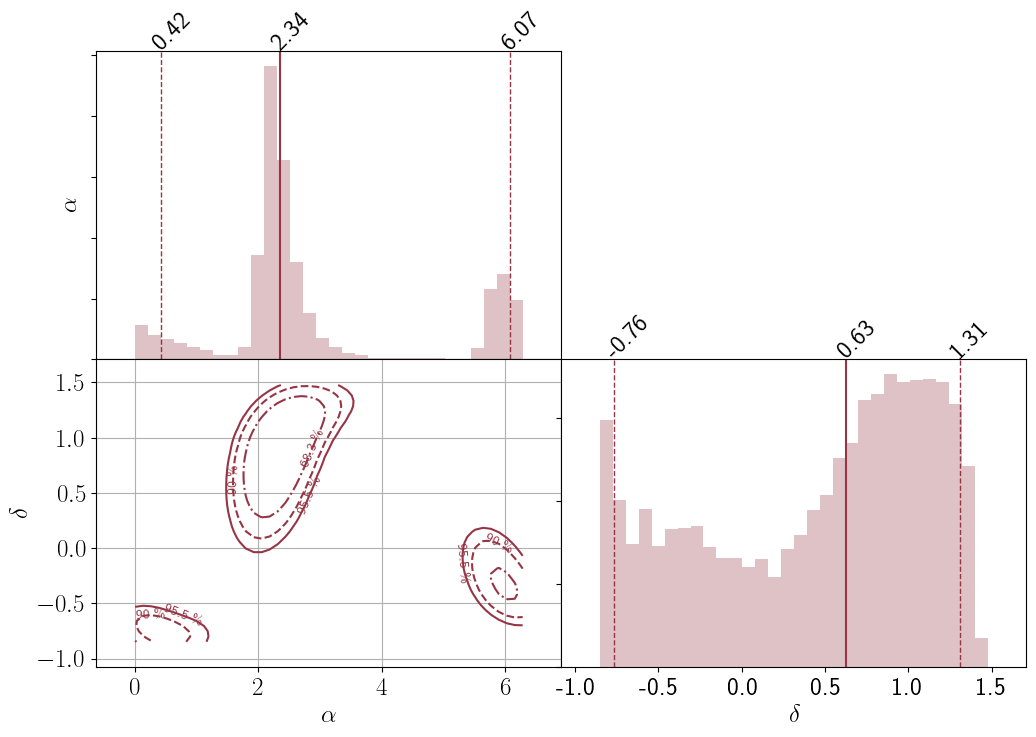

In [12]:
axs = pl.draw(["ra", "dec"], plot_type="contour", show_oned_median=True)

The number of contours to be plotted can be controlled through the argument `contour_levels`, which by default includes contours for $1-\sigma$, $2-\sigma$ and $90\%$ credible levels. Let us try adding our own:

/home/prayush/miniconda3/lib/python3.8/site-packages/pycorner/corner.py:573: UserWarning: The following kwargs were not used by contour: 'label'
  im = ax.contour(
/home/prayush/miniconda3/lib/python3.8/site-packages/pycorner/corner.py:735: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(new_xticklabels)


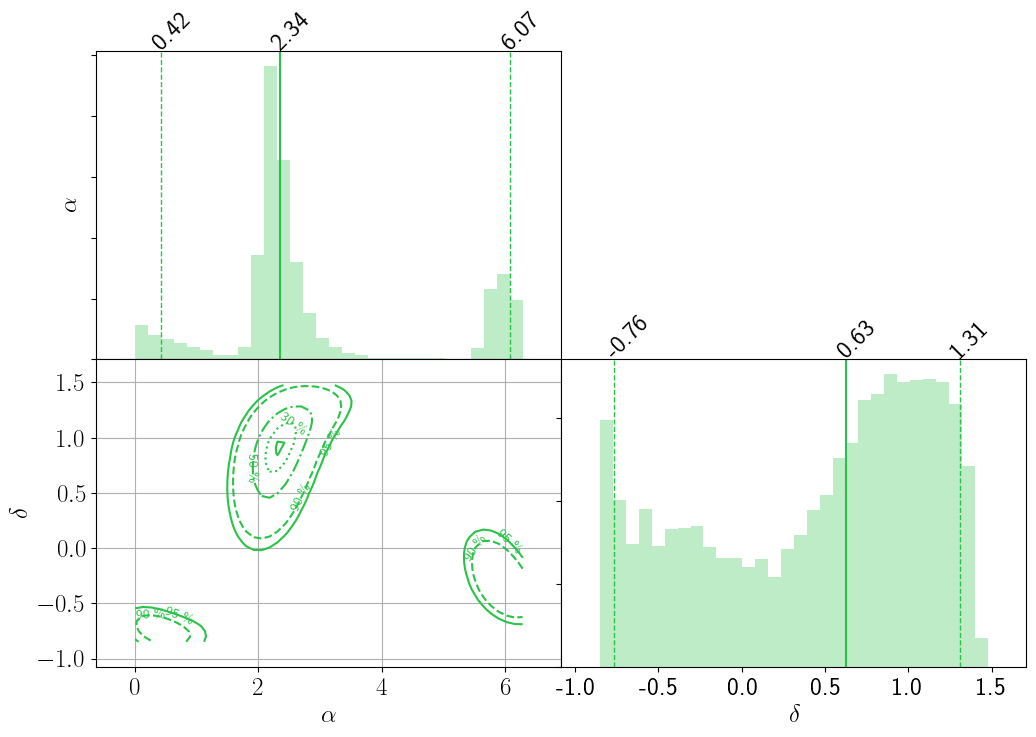

In [13]:
axs = pl.draw(
    ["ra", "dec"],
    plot_type="contour",
    contour_levels=[10.0, 30.0, 50.0, 90.0, 95.0],
    show_oned_median=True,
)

Lets plot another set of variables, the chirp mass and mass ratio for the source binary:

/home/prayush/miniconda3/lib/python3.8/site-packages/pycorner/corner.py:573: UserWarning: The following kwargs were not used by contour: 'label'
  im = ax.contour(
/home/prayush/miniconda3/lib/python3.8/site-packages/pycorner/corner.py:735: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(new_xticklabels)


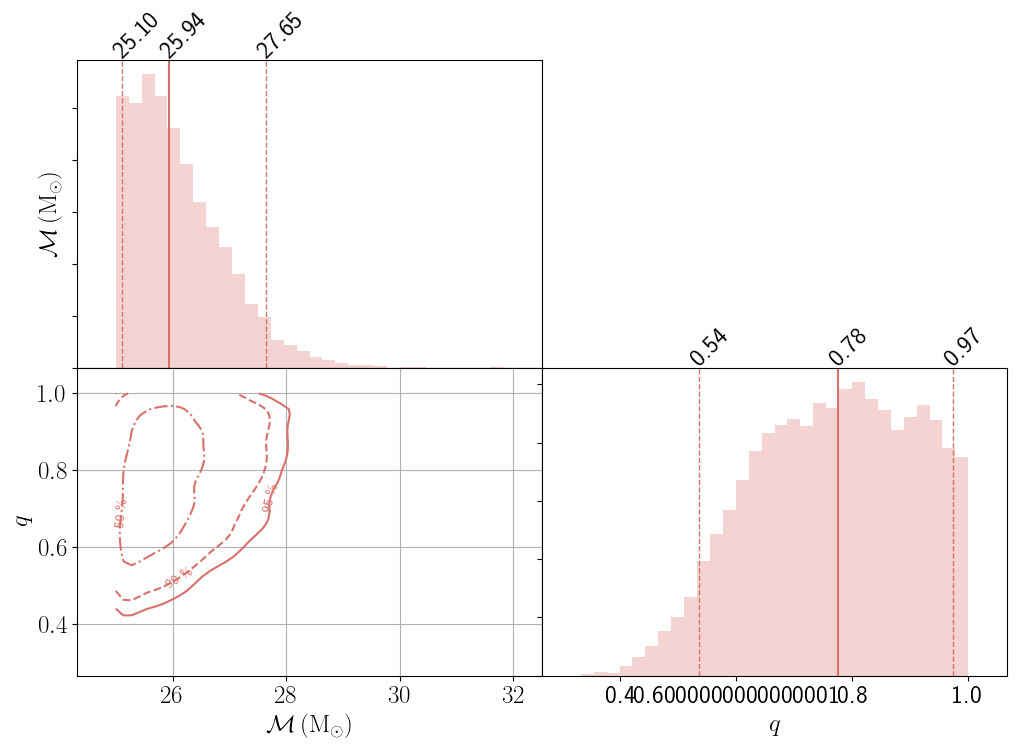

In [14]:
axs = pl.draw(
    ["chirp_mass", "mass_ratio"],
    plot_type="contour",
    contour_levels=[50.0, 90.0, 95.0],
    show_oned_median=True,
)

/home/prayush/miniconda3/lib/python3.8/site-packages/pycorner/corner.py:573: UserWarning: The following kwargs were not used by contour: 'label'
  im = ax.contour(
/home/prayush/miniconda3/lib/python3.8/site-packages/pycorner/corner.py:735: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(new_xticklabels)


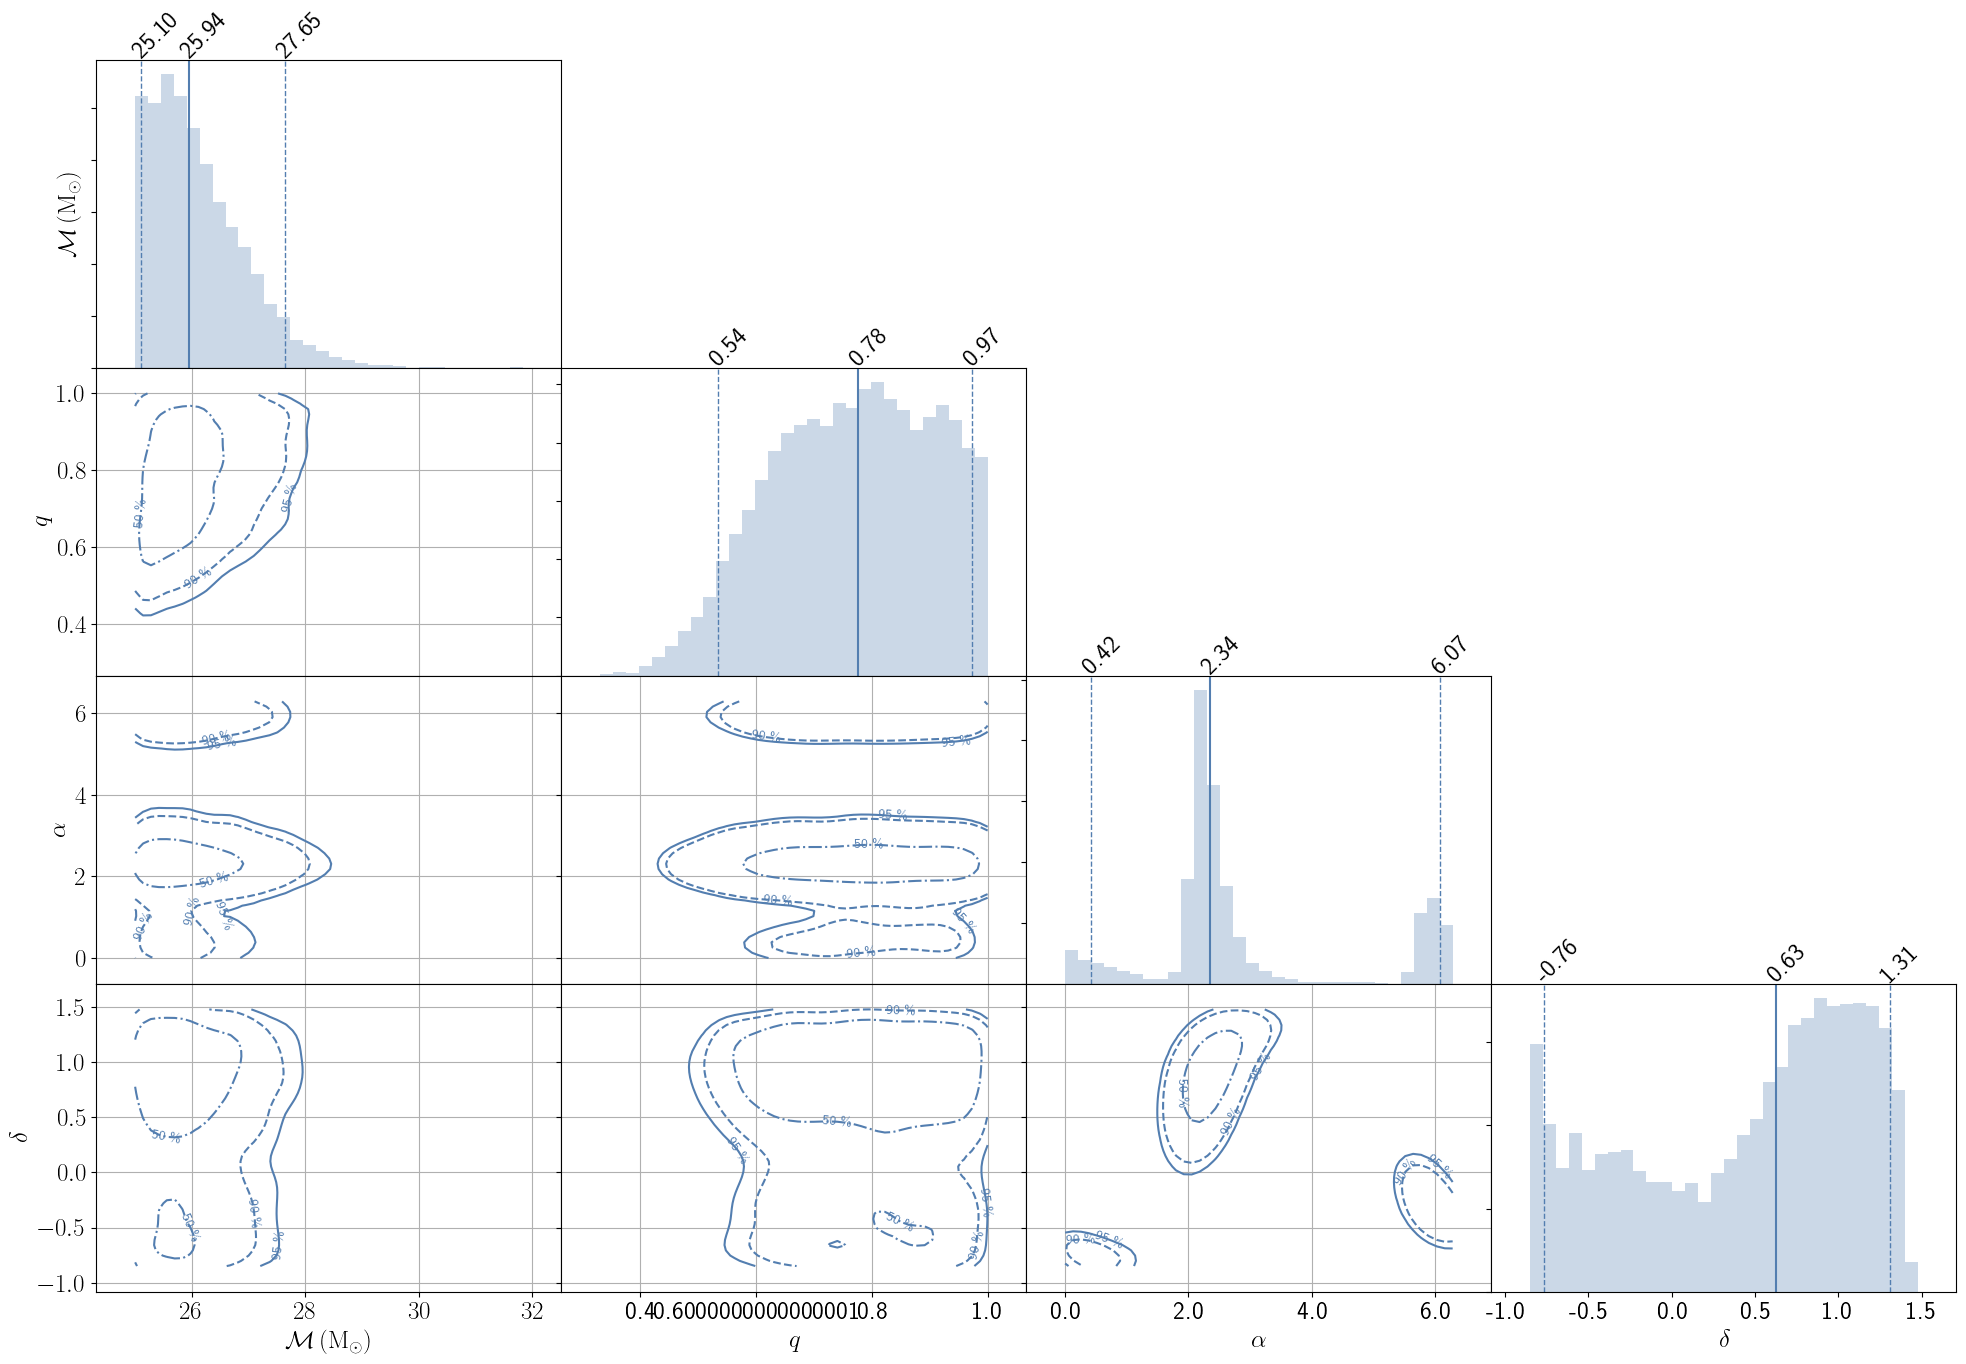

In [15]:
axs = pl.draw(
    ["chirp_mass", "mass_ratio", "ra", "dec"],
    plot_type="contour",
    contour_levels=[50.0, 90.0, 95.0],
    show_oned_median=True,
)

The fontsizes are probably not big enough in the previous panel. The default was to use `fontsize=18`, we can increase it thus:

/home/prayush/miniconda3/lib/python3.8/site-packages/pycorner/corner.py:573: UserWarning: The following kwargs were not used by contour: 'label'
  im = ax.contour(
/home/prayush/miniconda3/lib/python3.8/site-packages/pycorner/corner.py:735: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(new_xticklabels)


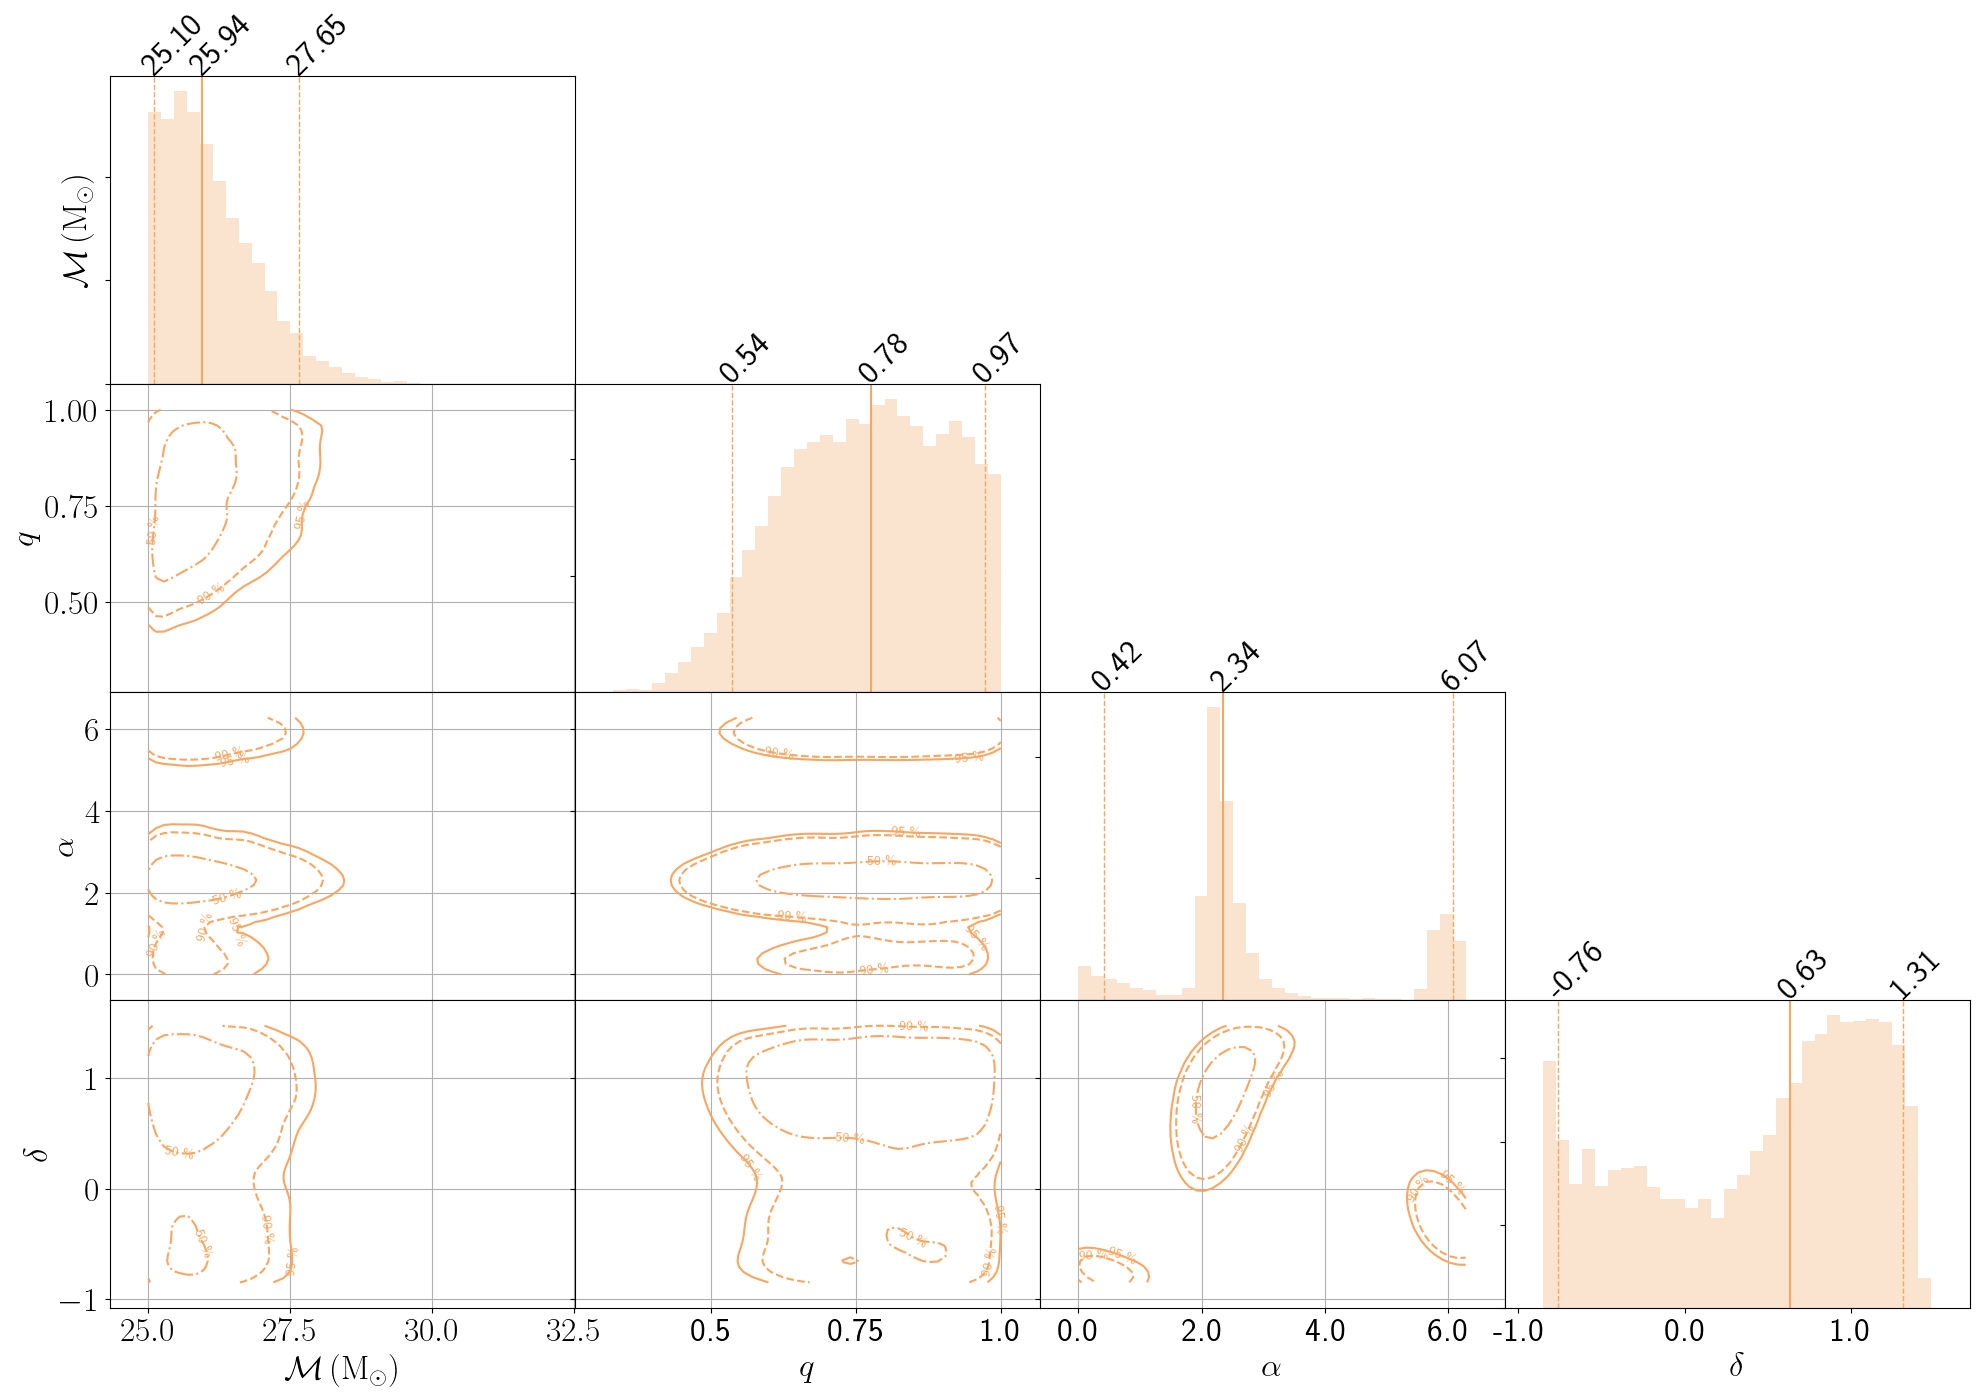

In [16]:
axs = pl.draw(
    ["chirp_mass", "mass_ratio", "ra", "dec"],
    plot_type="contour",
    contour_levels=[50.0, 90.0, 95.0],
    show_oned_median=True,
    fontsize=24,
)

### Adding a 3rd dimension on 2D panels

Sometimes we may want to visualize a third dimension on the 2D panels in addition to the number density that we anyway find on those. We can add this by setting `param_color` to the name of that parameter (must be part of the original dataset that the `CornerPlot` object was initialized with):

/home/prayush/miniconda3/lib/python3.8/site-packages/pycorner/corner.py:735: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(new_xticklabels)


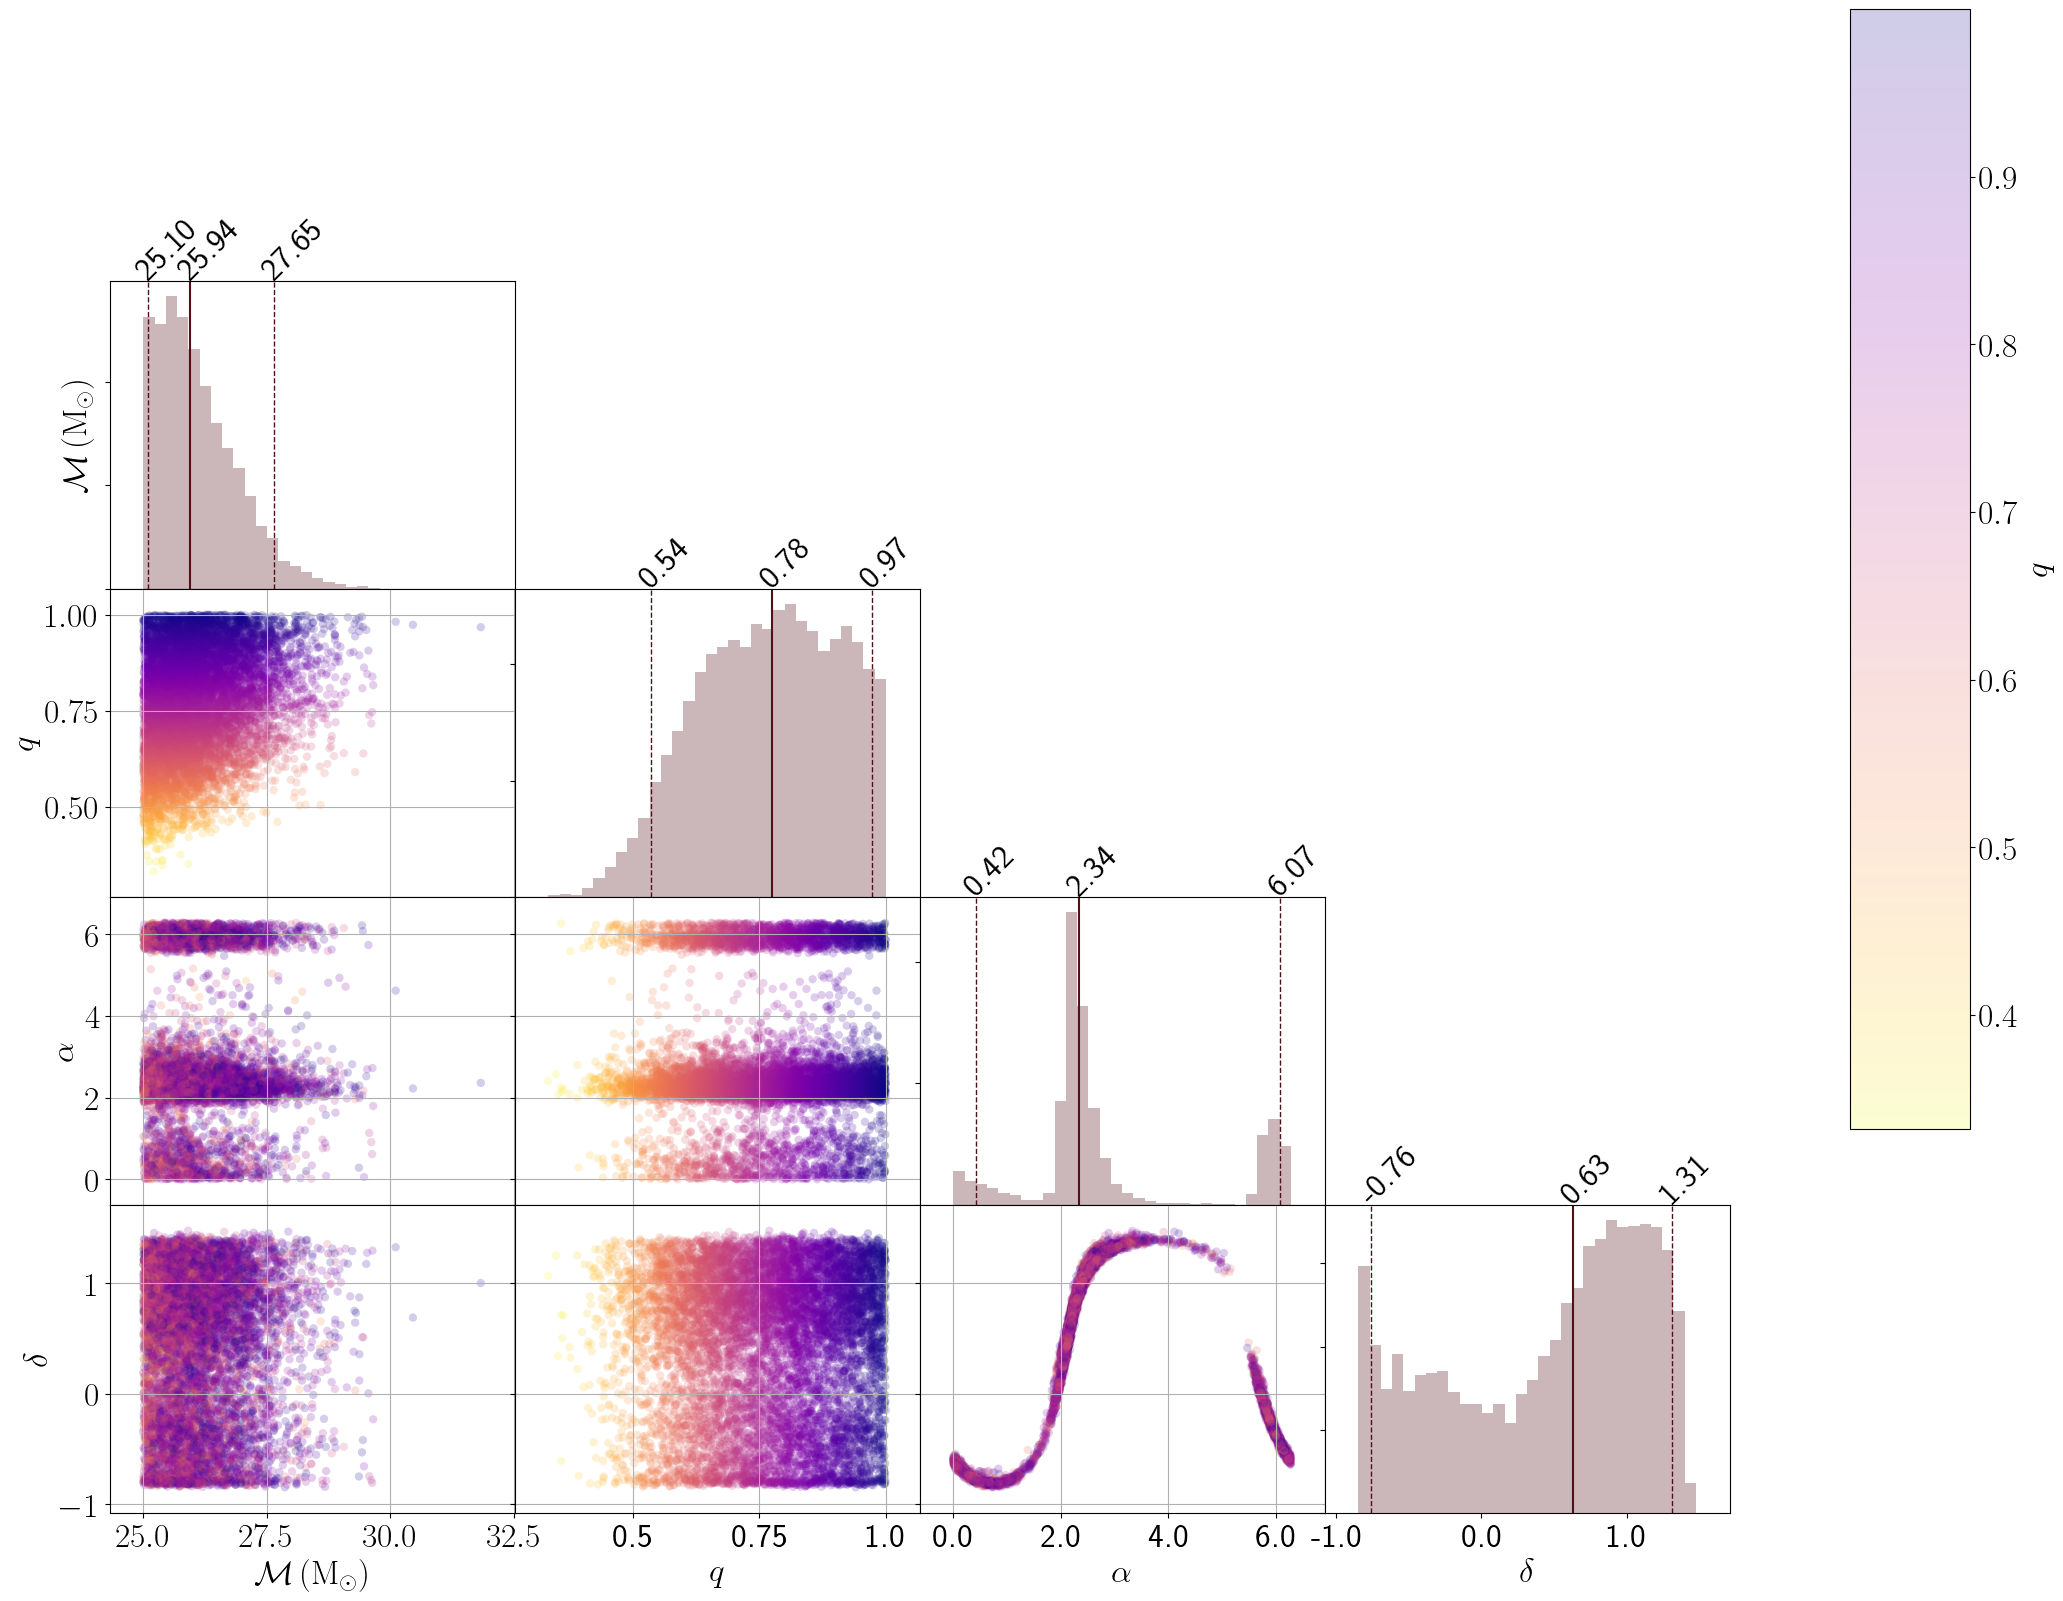

In [17]:
axs = pl.draw(
    ["chirp_mass", "mass_ratio", "ra", "dec"],
    plot_type="scatter",
    param_color="mass_ratio",
    contour_levels=[50.0, 90.0, 95.0],
    show_oned_median=True,
    fontsize=24,
)

Or if one wants, they can forego the number density completely and simply show contours of the 3rd dimension.

/home/prayush/miniconda3/lib/python3.8/site-packages/pycorner/corner.py:735: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(new_xticklabels)


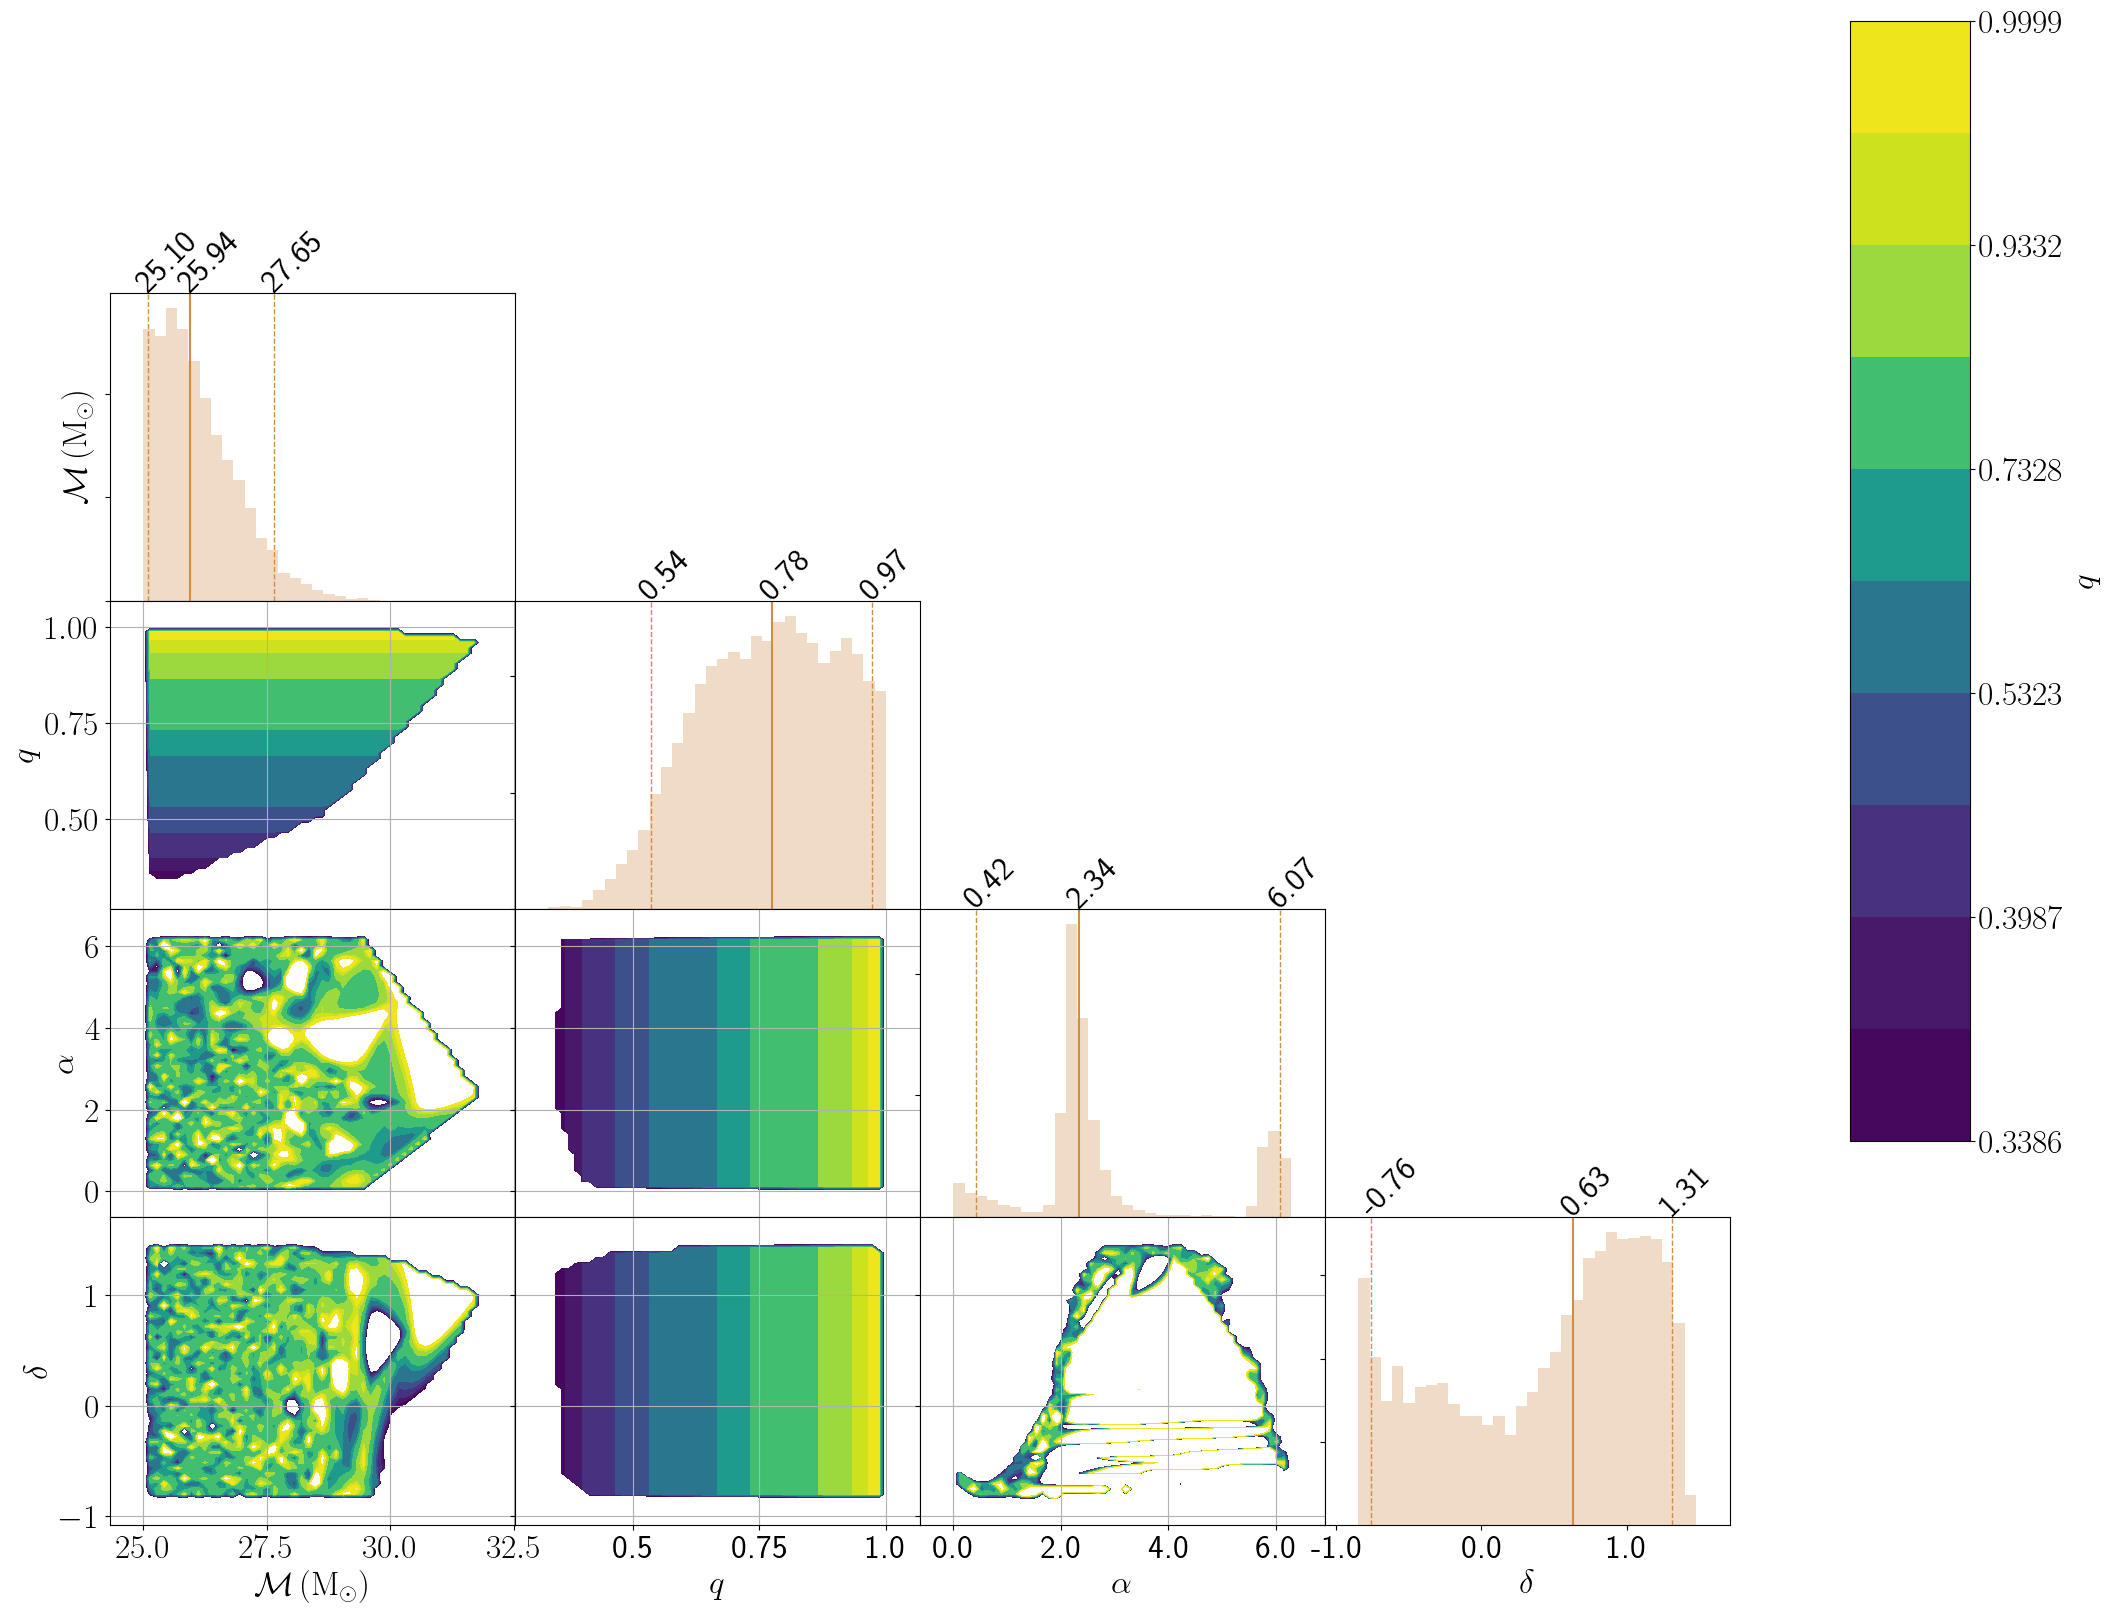

In [18]:
axs = pl.draw(
    ["chirp_mass", "mass_ratio", "ra", "dec"],
    plot_type="contour",
    param_color="mass_ratio",
    contour_levels=[10.0, 30.0, 50.0, 60.0, 70.0, 80.0, 90.0, 95.0],
    show_oned_median=True,
    fontsize=24,
)

In the example below it doesn't come out very well because we are simply showing the mass ratio as the 3rd dimension, which is either monotonically changing in the 2D panels or is (as it must be) randomly distributed.

### Showing true values in case those are known

/home/prayush/miniconda3/lib/python3.8/site-packages/pycorner/corner.py:735: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(new_xticklabels)


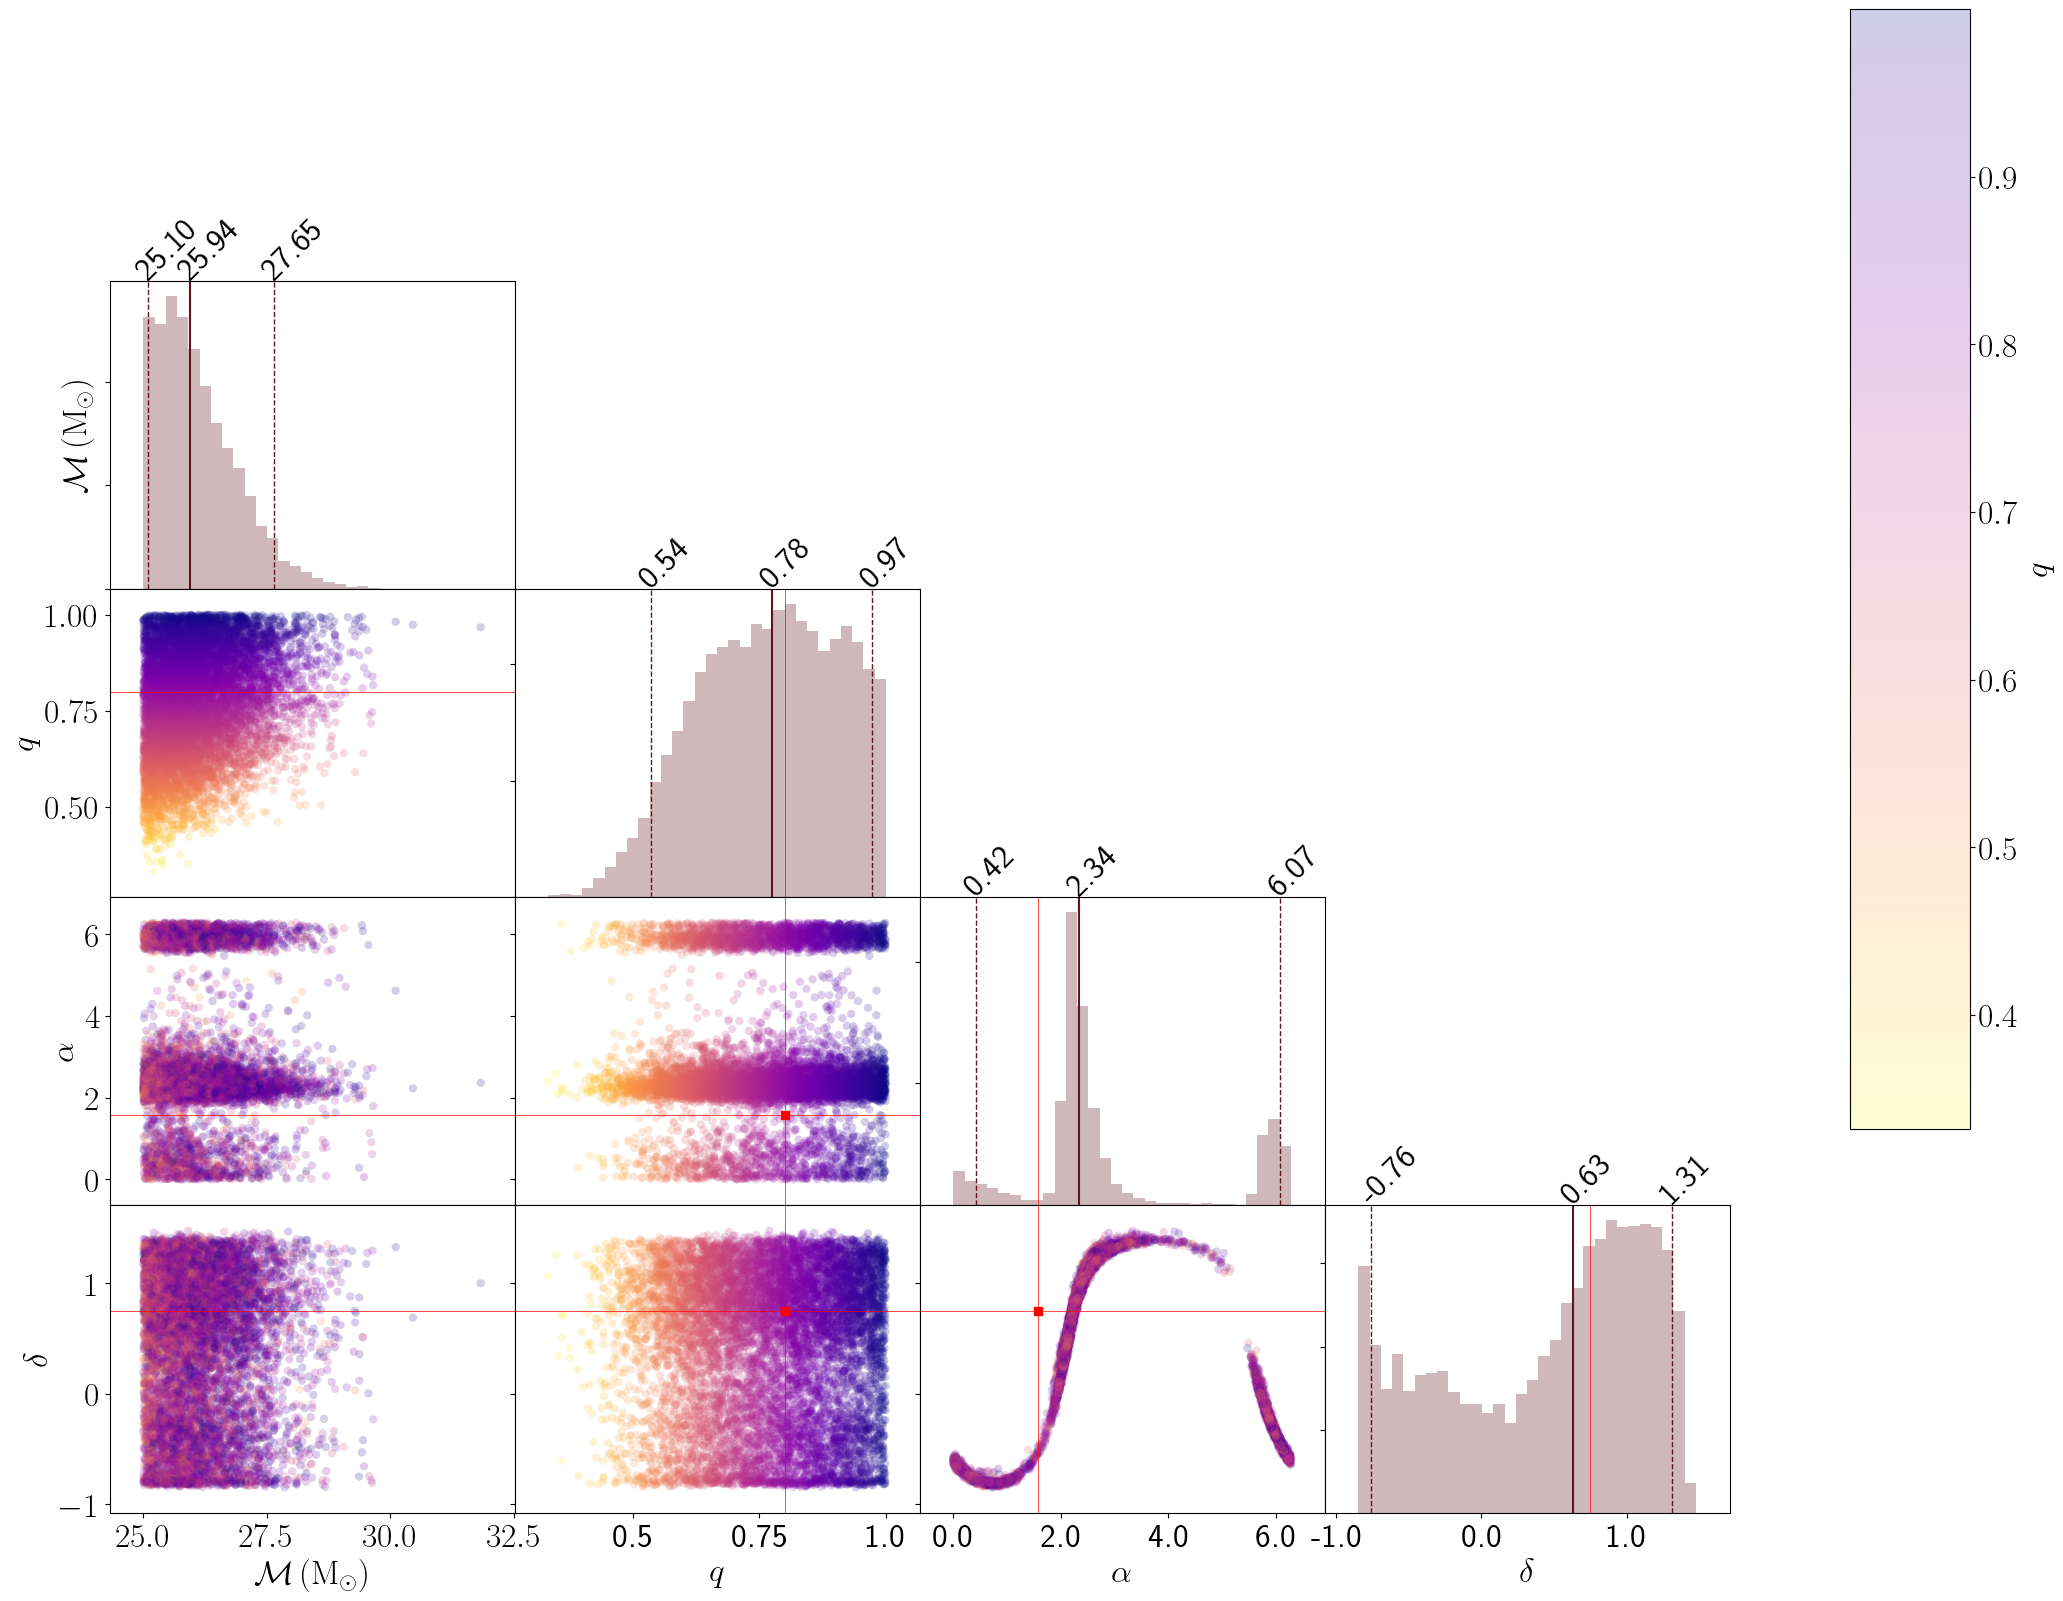

In [19]:
axs = pl.draw(
    ["chirp_mass", "mass_ratio", "ra", "dec"],
    plot_type="scatter",
    param_color="mass_ratio",
    contour_levels=[50.0, 90.0, 95.0],
    true_params_vals=[8.5, 0.8, 1.57, 0.75],
    grid_twod_on=False,
    show_oned_median=True,
    fontsize=24,
)

### Multiple visualizations on the same corner plot

There are many use cases for showing multiple distributions on the same figure, for e.g. when one wants to compare parameter recovery from diferent waveform models, or when one wants to compare different events with each other. The `CornerPlot` class allows for trivial combination of multiple such data sets.

As the first use case, let us image if we want to show both credible-level contours as well as a scatter plot on the 2D panels marking a 3rd dimension (here taken to be the mass ratio $q$). We first draw the scatter plots on the 2D panels as well as the 1D histograms with the first of the two function calls below and catch the returned figure and axis array. Then we use the same figure/axes and add contours on just the 2D panels, while disabling any drawing on the 1D panels using `skip_oned_hists=True`:

/home/prayush/miniconda3/lib/python3.8/site-packages/pycorner/corner.py:573: UserWarning: The following kwargs were not used by contour: 'label'
  im = ax.contour(


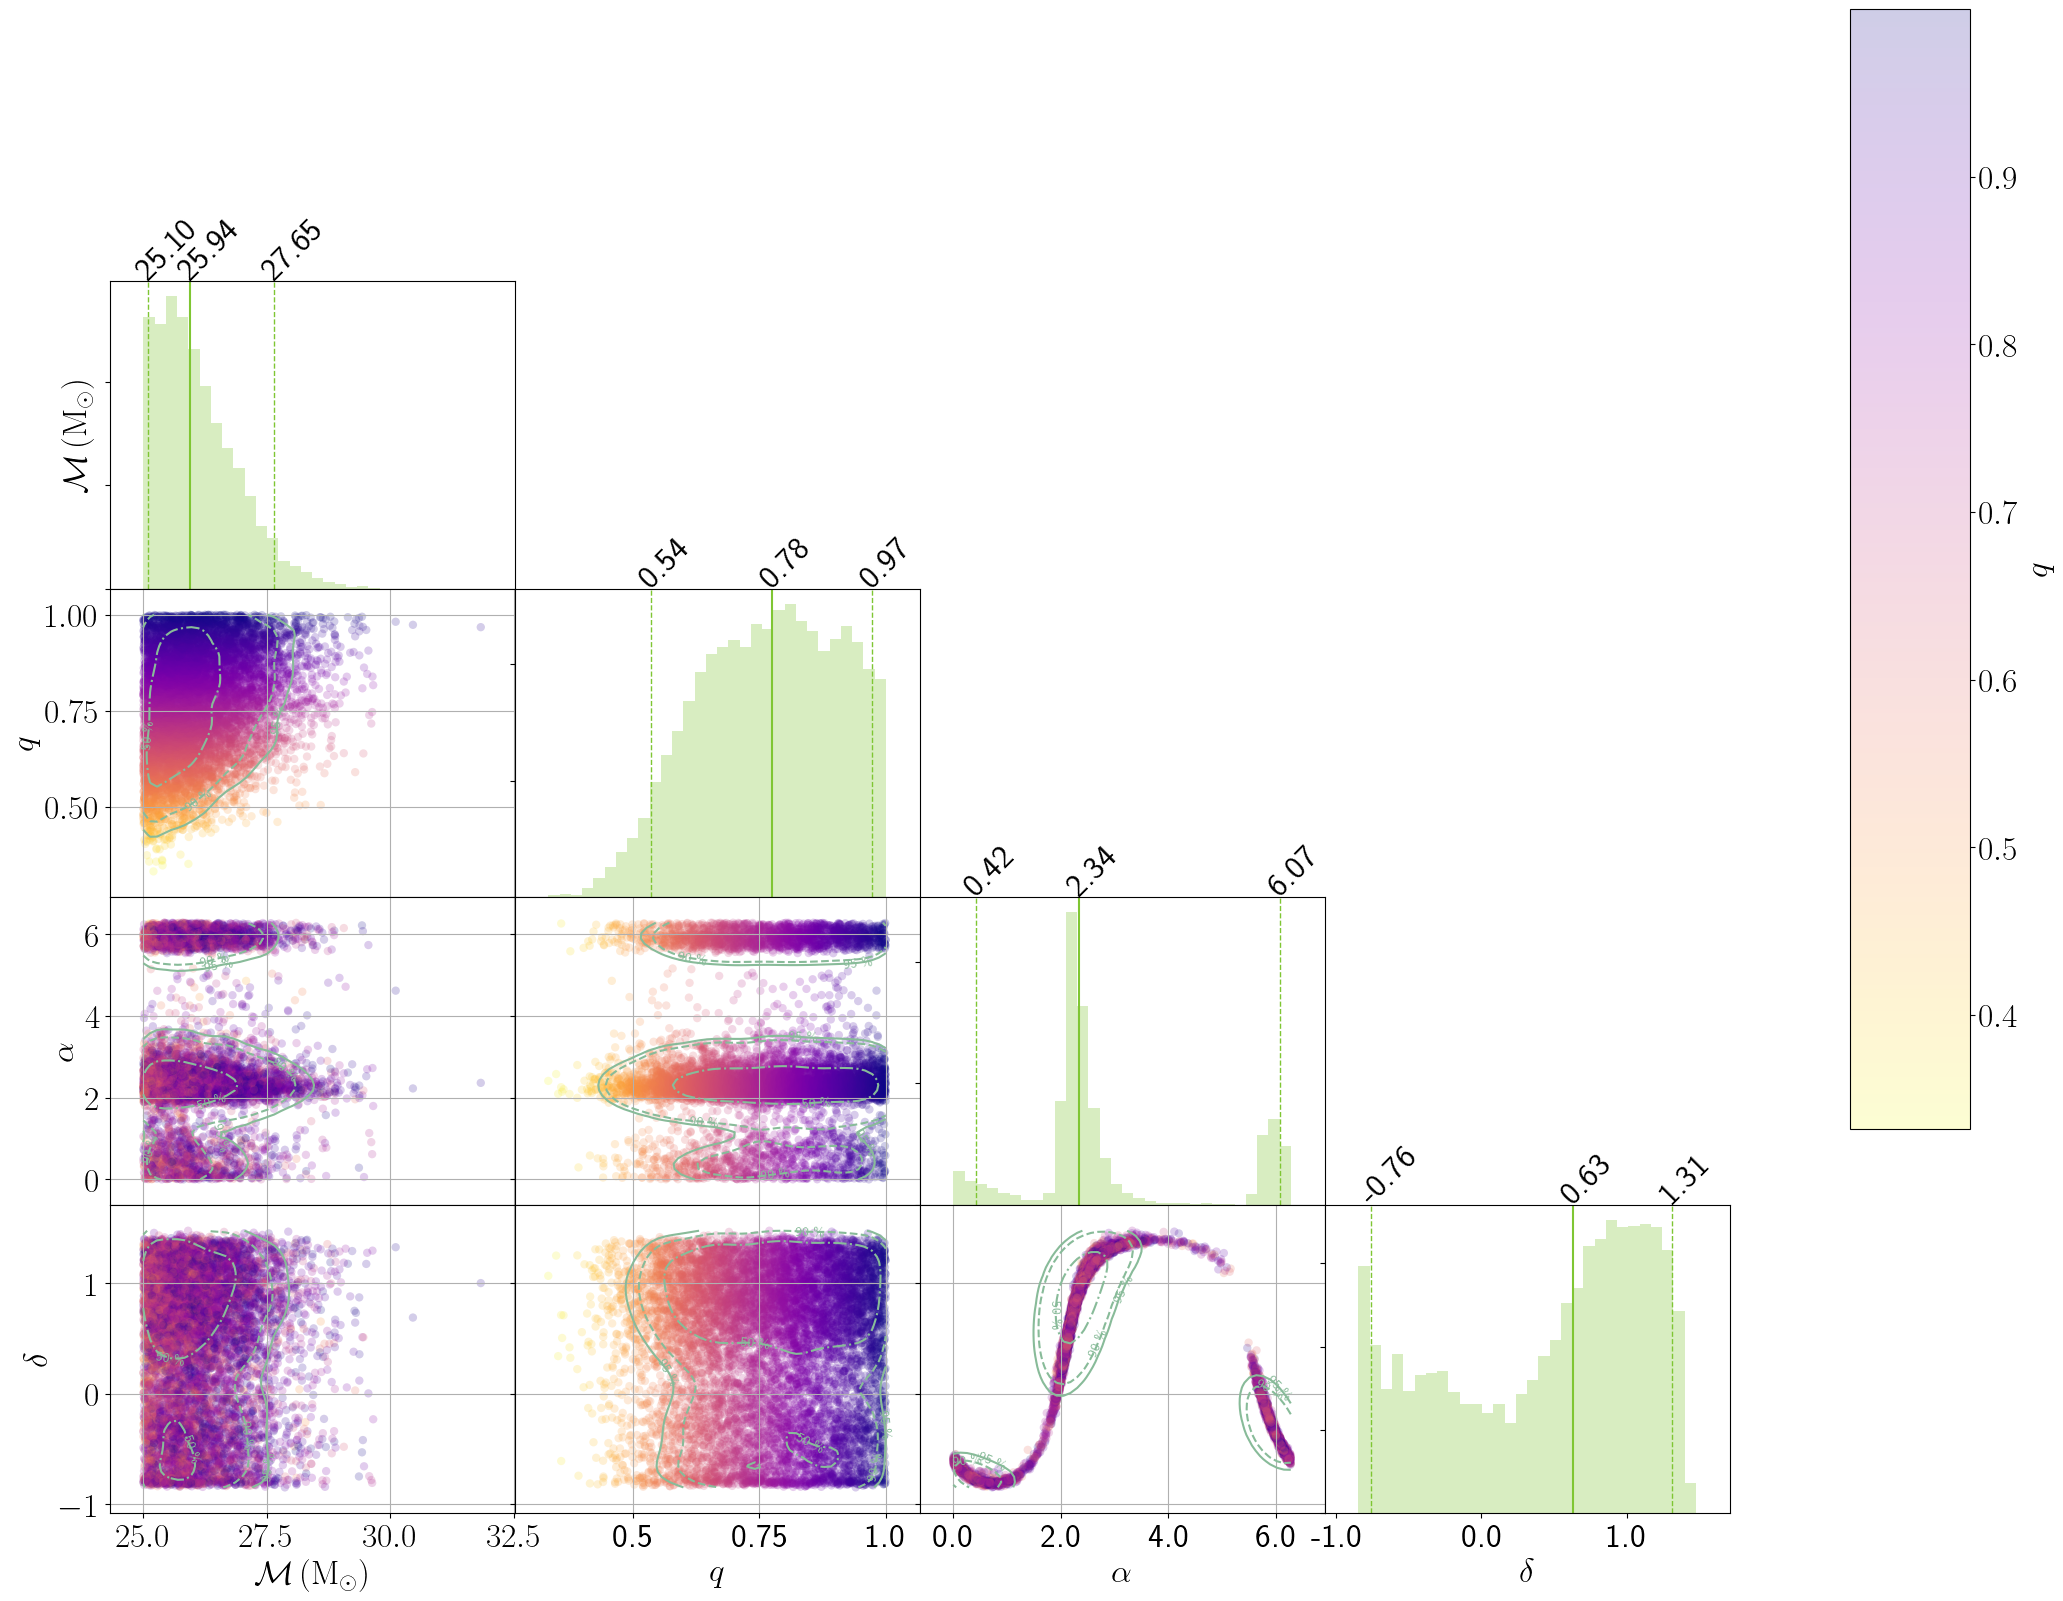

In [20]:
f, axs = pl.draw(
    ["chirp_mass", "mass_ratio", "ra", "dec"],
    plot_type="scatter",
    param_color="mass_ratio",
    show_oned_median=True,
    fontsize=24,
)

f, axs = pl.draw(
    ["chirp_mass", "mass_ratio", "ra", "dec"],
    plot_type="contour",
    contour_levels=[50.0, 90.0, 95.0],
    skip_oned_hists=True,
    fontsize=24,
    fig=f,
    axes_array=axs,
)

For our second use case we first make a dummy posterior and show it alongside our original posterior set.

In [21]:
post2 = post.copy()
# multiplying all samples by 1.2
post2["chirp_mass"] = post2["chirp_mass"] * 1.2
post2["mass_ratio"] = post2["mass_ratio"] * 1.2

pl2 = CornerPlot(post2.to_numpy(), var_names=post.columns.to_list())

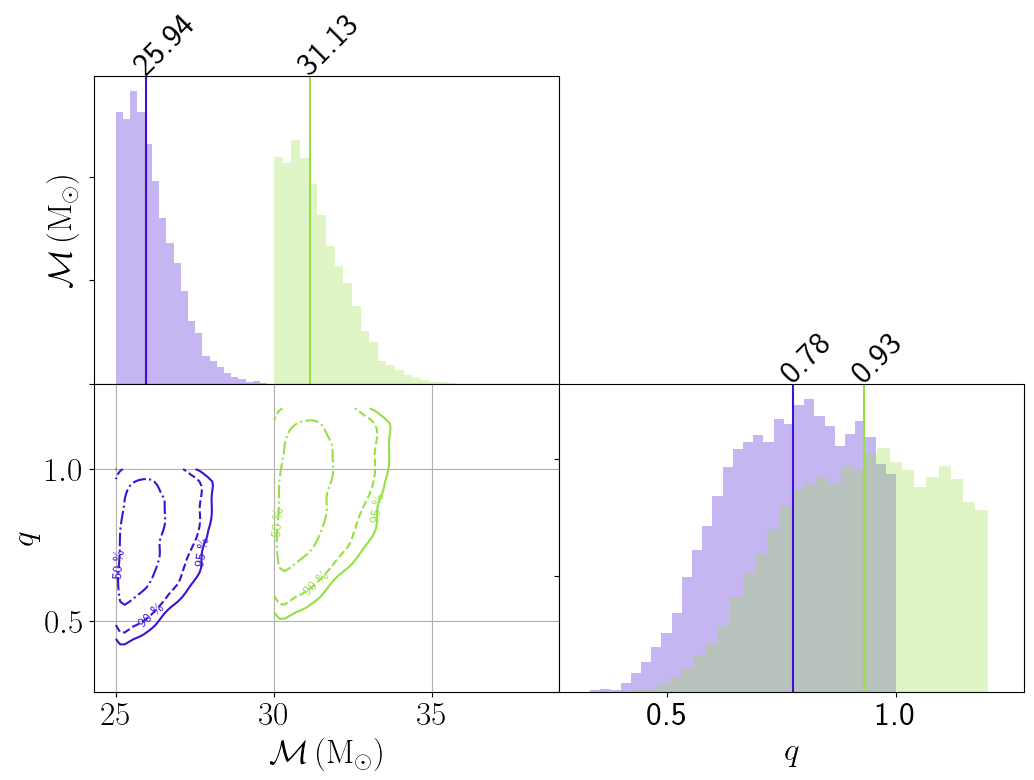

In [22]:
f, axs = pl.draw(
    ["chirp_mass", "mass_ratio"],
    plot_type="contour",
    contour_levels=[50.0, 90.0, 95.0],
    show_oned_percentiles=-1,
    show_oned_median=True,
    fontsize=24,
)

f, axs = pl2.draw(
    ["chirp_mass", "mass_ratio"],
    plot_type="contour",
    contour_levels=[50.0, 90.0, 95.0],
    show_oned_percentiles=-1,  # disabled showing 90% credible intervals on 1D panels
    show_oned_median=True,
    fontsize=24,
    fig=f,
    axes_array=axs,
)

These can be labelled by providing a `label` and enabling the display of legends with `legend=True`. We only support and encourage placing the legend on 1D panels, and that too only the first one. 

/home/prayush/miniconda3/lib/python3.8/site-packages/pycorner/corner.py:573: UserWarning: The following kwargs were not used by contour: 'label'
  im = ax.contour(
/home/prayush/miniconda3/lib/python3.8/site-packages/pycorner/corner.py:735: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(new_xticklabels)


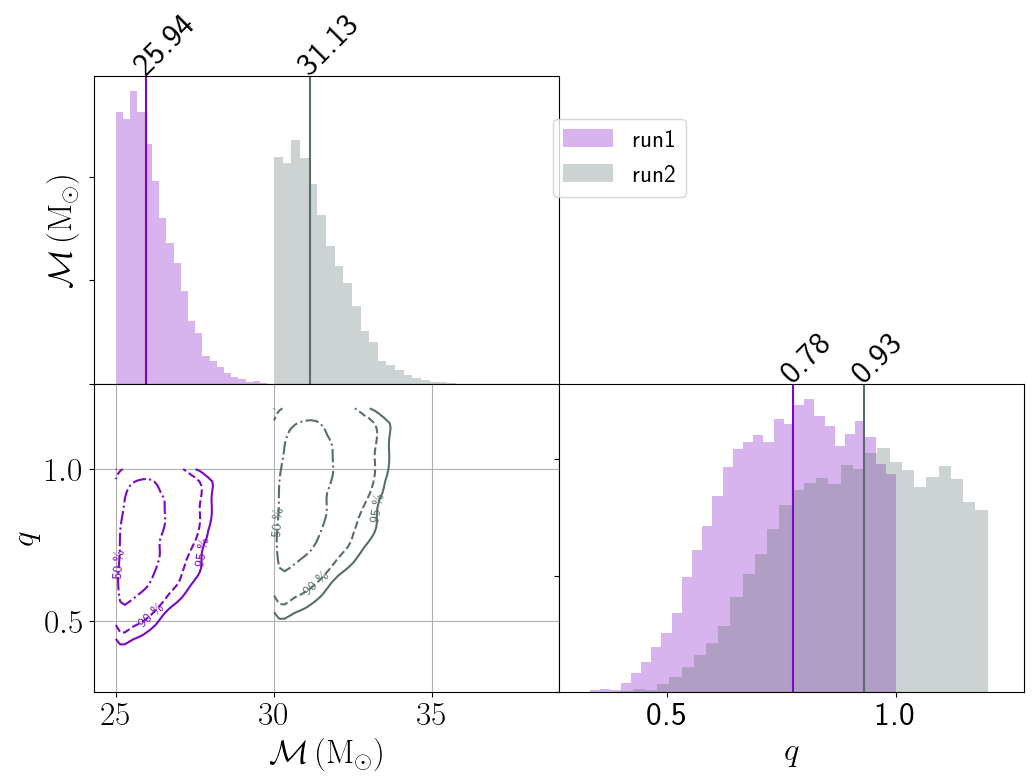

In [23]:
f, axs = pl.draw(
    ["chirp_mass", "mass_ratio"],
    plot_type="contour",
    contour_levels=[50.0, 90.0, 95.0],
    show_oned_percentiles=-1,
    show_oned_median=True,
    label="run1",
    legend=True,
    fontsize=24,
)

f, axs = pl2.draw(
    ["chirp_mass", "mass_ratio"],
    plot_type="contour",
    contour_levels=[50.0, 90.0, 95.0],
    show_oned_percentiles=-1,  # disabled showing 90% credible intervals on 1D panels
    show_oned_median=True,
    label="run2",
    legend=True,
    fontsize=24,
    fig=f,
    axes_array=axs,
)

If for some reason one wants to have a legend on every 1D panel, that can be done by setting `label_oned_hists` to `-1` for all 1D panels or to a list of integers indexing the intended set of panels (this can be a useful feature when the number of parameters is large).

/home/prayush/miniconda3/lib/python3.8/site-packages/pycorner/corner.py:573: UserWarning: The following kwargs were not used by contour: 'label'
  im = ax.contour(
/home/prayush/miniconda3/lib/python3.8/site-packages/pycorner/corner.py:735: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(new_xticklabels)


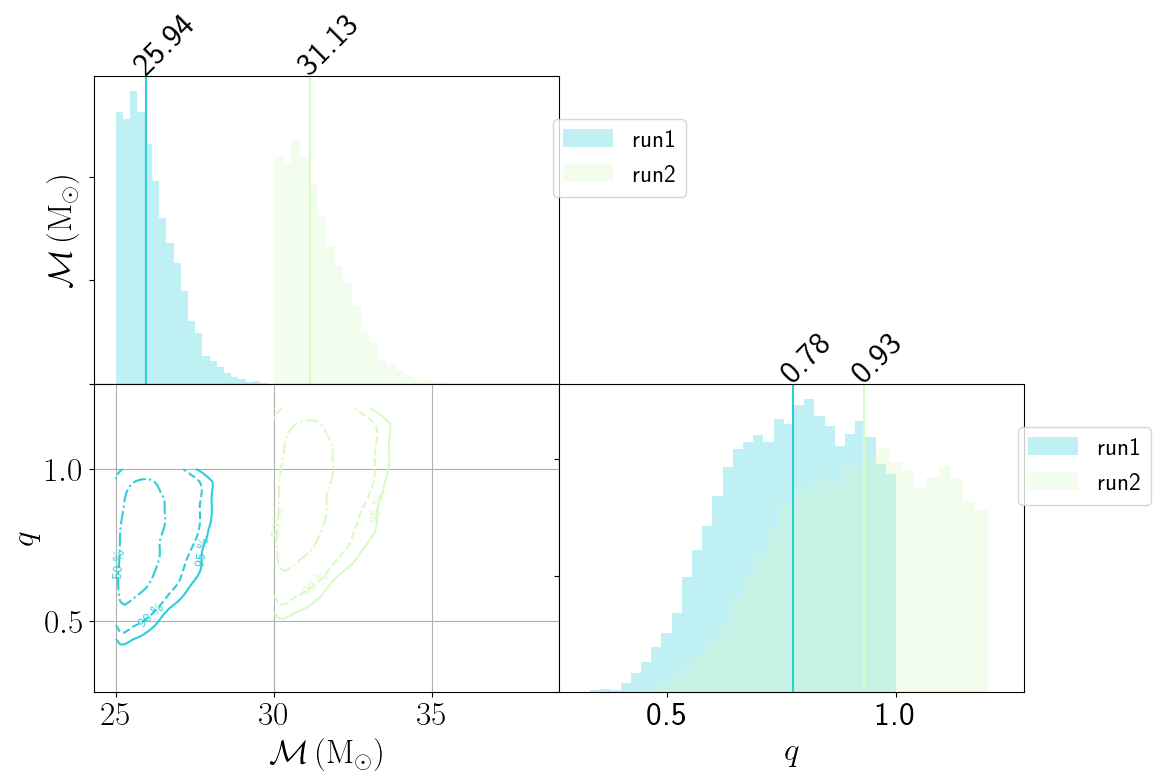

In [24]:
f, axs = pl.draw(
    ["chirp_mass", "mass_ratio"],
    plot_type="contour",
    contour_levels=[50.0, 90.0, 95.0],
    show_oned_percentiles=-1,
    show_oned_median=True,
    label="run1",
    legend=True,
    fontsize=24,
)

f, axs = pl2.draw(
    ["chirp_mass", "mass_ratio"],
    plot_type="contour",
    contour_levels=[50.0, 90.0, 95.0],
    show_oned_percentiles=-1,  # disabled showing 90% credible intervals on 1D panels
    show_oned_median=True,
    label="run2",
    legend=True,
    label_oned_hists=-1,
    fontsize=24,
    fig=f,
    axes_array=axs,
)

Combining some of these features, let us visualize two runs. For the first, we show contours of posterior density, alongside a scatterplot showing the number density of samples. For the second, we show a scatterplot showing the number density but also with a heatmap showing a 3rd dimension (here, simply, the mass ratio):

/home/prayush/miniconda3/lib/python3.8/site-packages/pycorner/corner.py:523: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  im = ax.scatter(


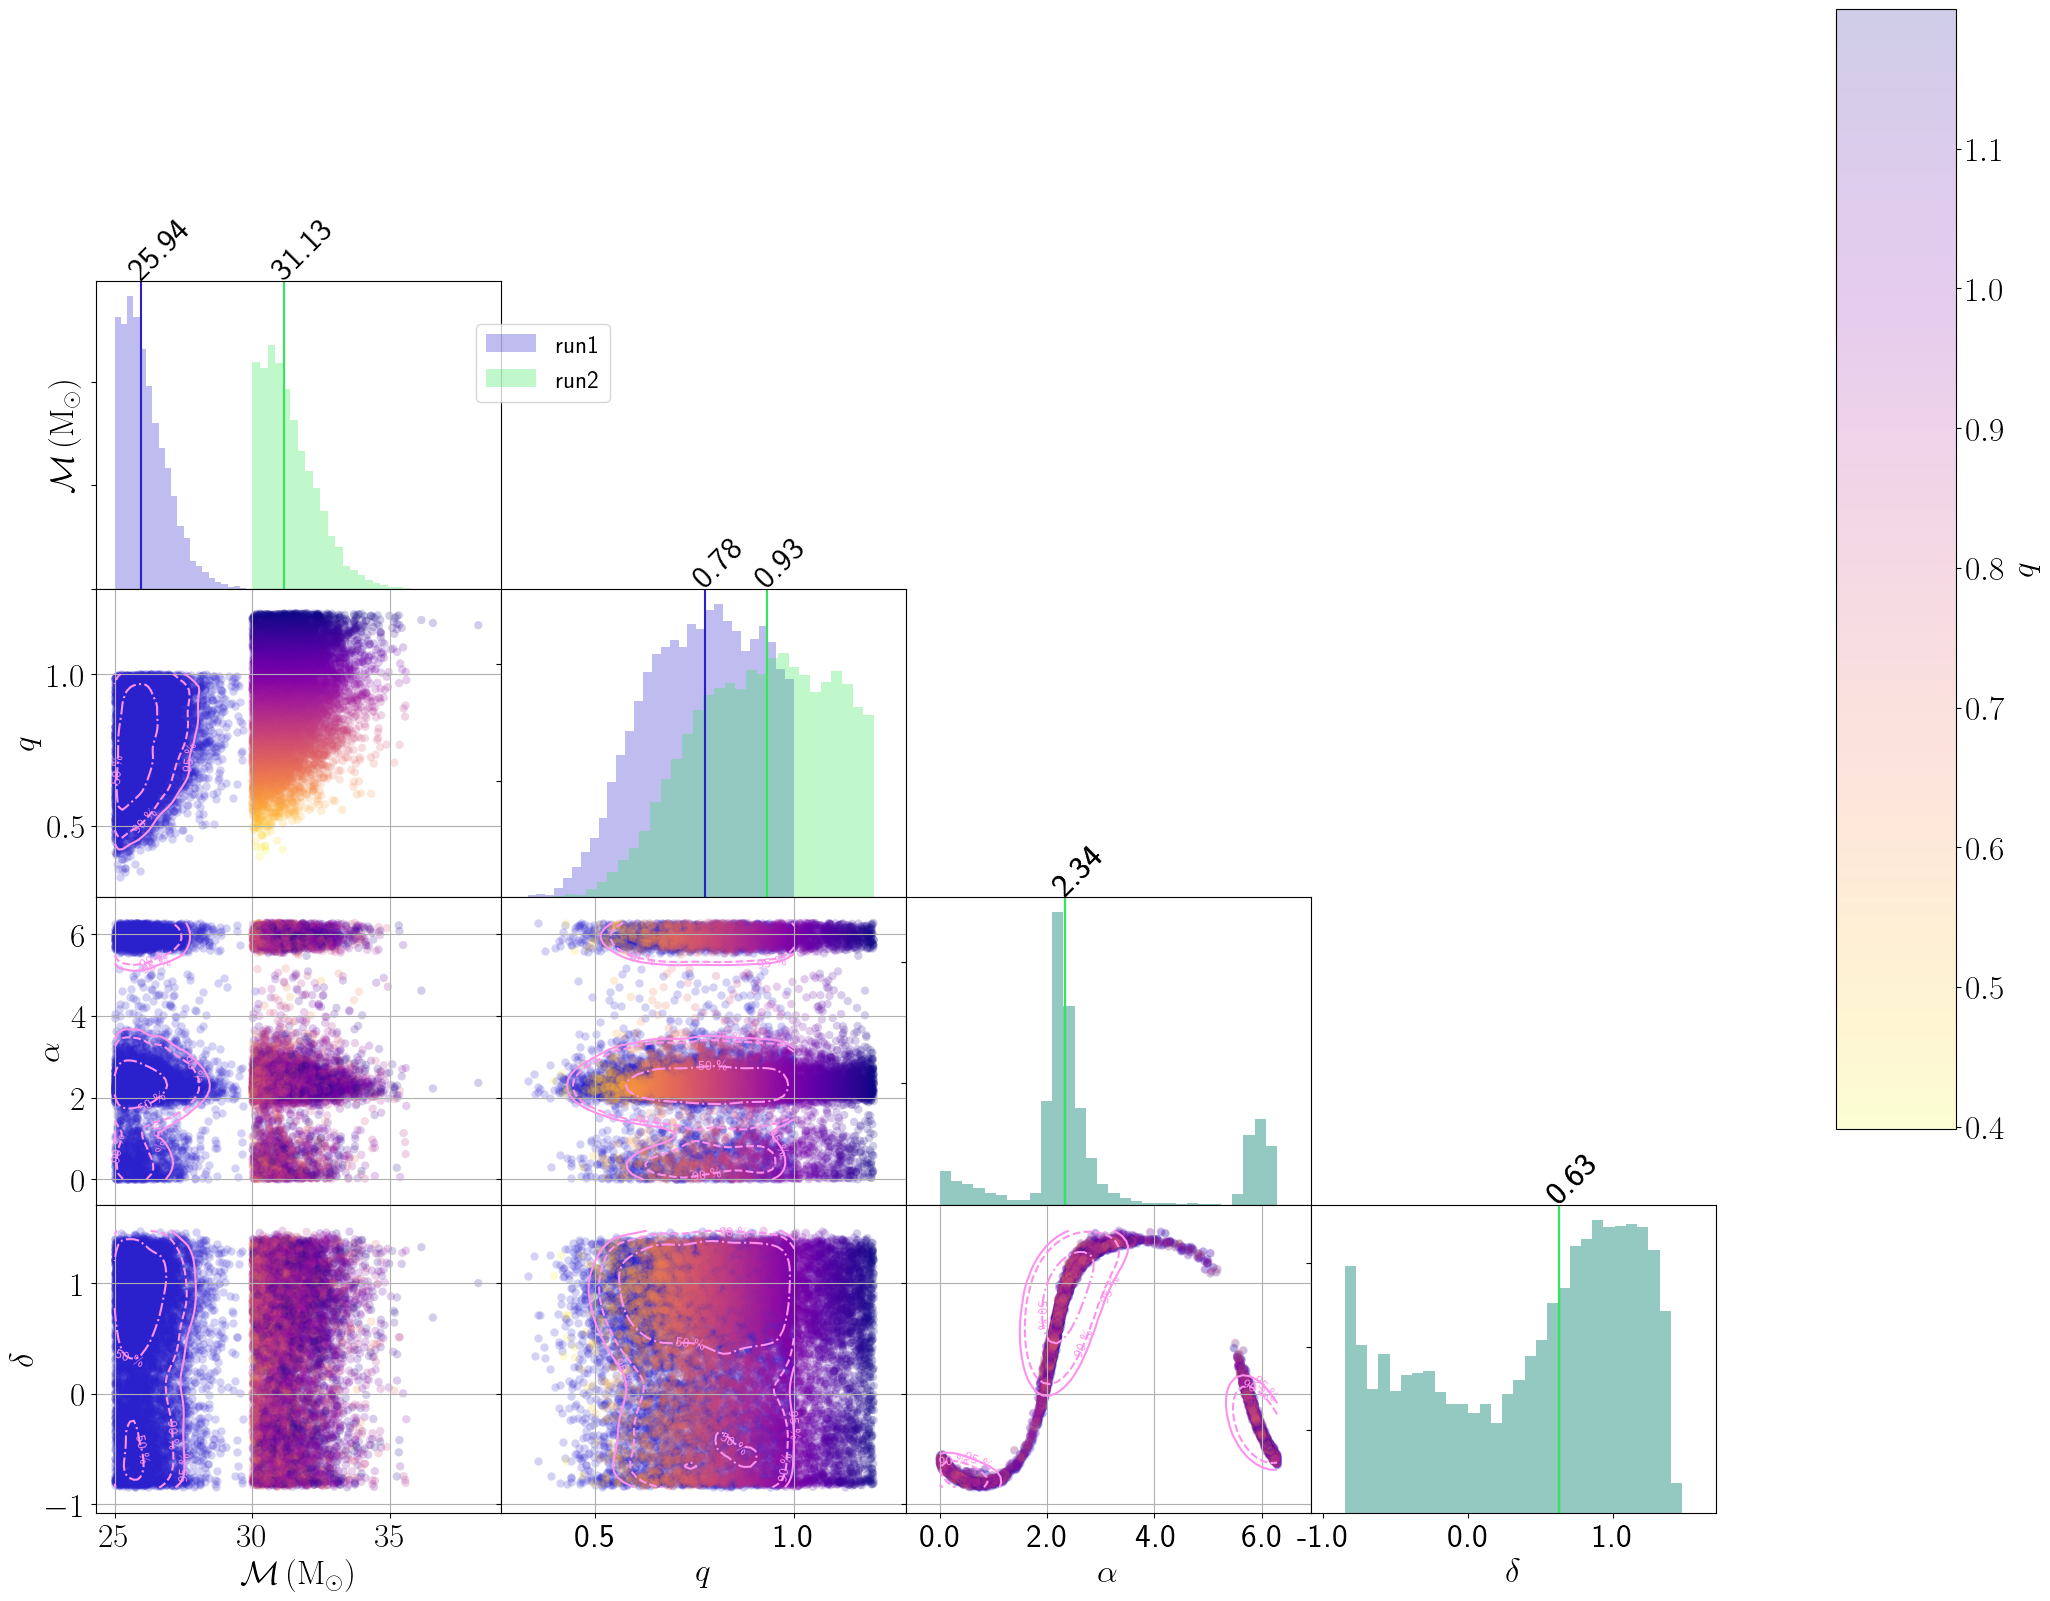

In [25]:
f, axs = pl.draw(
    ["chirp_mass", "mass_ratio", "ra", "dec"],
    plot_type="scatter",
    show_oned_median=True,
    show_oned_percentiles=-1,
    label="run1",
    legend=True,
    fontsize=24,
)

f, axs = pl.draw(
    ["chirp_mass", "mass_ratio", "ra", "dec"],
    plot_type="contour",
    contour_levels=[50.0, 90.0, 95.0],
    skip_oned_hists=True,
    show_oned_percentiles=-1,
    fontsize=24,
    fig=f,
    axes_array=axs,
)

f, axs = pl2.draw(
    ["chirp_mass", "mass_ratio", "ra", "dec"],
    plot_type="scatter",
    param_color="mass_ratio",
    skip_oned_hists=False,
    show_oned_median=True,
    show_oned_percentiles=-1,
    fontsize=24,
    label="run2",
    legend=True,
    fig=f,
    axes_array=axs,
)

Clearly, this is not a realistic use case but only a demonstration of how different cornerplots can be overlaid seamlessly here.